In [11]:
import csv
import cv2
import sklearn
import numpy as np
from keras_tqdm import TQDMNotebookCallback
from log_progress import log_progress
from enum import Enum

import sys
sys.stdout.isatty()


False

In [12]:
lines = []

paths_to_import = ['D:\\Car Engine\\Success 1\\', 'D:\\Car Engine\\Attempt on Track 2\\']

samples = []

correction = 0.2

pic_mutation = Enum('PicMutation', 'flipped unflipped')
for base_path in paths_to_import:
    with open(base_path + 'driving_log.csv') as csvfile:
        reader = csv.reader(csvfile)
        i = 0
        for line in reader:
            center_path = line[0]
            left_path = line[1]
            right_path = line[2]
            steering_center = float(line[3])
            samples.append((base_path,center_path, steering_center, pic_mutation.unflipped))
            samples.append((base_path,center_path, steering_center * -1, pic_mutation.flipped))

            #samples.append((left_path, steering_center + correction, unflipped))
            #samples.append((right_path, steering_center - correction, unflipped))

            #samples.append((center_path, steering_center * -1, flipped))
            #samples.append((left_path, (steering_center + correction) * -1, flipped))
            #samples.append((right_path, (steering_center - correction) * -1, flipped))

            i+=1
            if i % 1000 == 0:
                print(i)


1000
2000
3000
4000
5000
6000
7000
8000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000


In [13]:
def process_image(x):
    return x/127.5 - 1.

def load_image(sample):
    name = sample[0] + 'IMG\\'+ sample[1].split("\\")[-1]
    img = cv2.imread( name)
    if sample[3] == pic_mutation.flipped:
        img=cv2.flip(img,1)
    if img is None:
        print("Name is bad", name)
        awd
    return img
#    return process_image(cv2.imread(name))

X_train = np.array([load_image(sample) for sample in log_progress(samples)])
Y_train = np.array([sample[2] for sample in log_progress(samples)])

In [14]:
X_train[0].shape

(160, 320, 3)

(75, 320, 3)


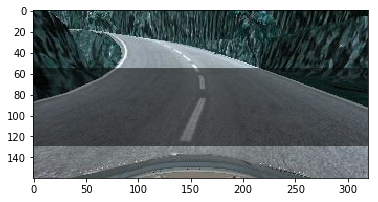

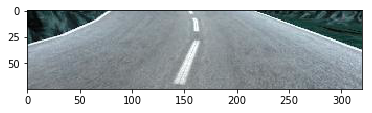

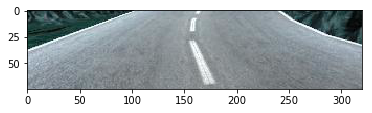

In [15]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

img = X_train[20000].copy()

start = 55
end = 130
height = img.shape[1]
width = img.shape[0]



img[start:end] = img[start:end] * 0.5
plt.figure()
plt.imshow(img)

img = X_train[20000][start:end]
print(img.shape)
plt.figure()
plt.imshow(img)

plt.figure()
plt.imshow(cv2.flip(img,1))


In [16]:
ch, row, col = 3, 160, 320

In [17]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda
from keras.layers.convolutional import Cropping2D, Conv2D
model = Sequential()
# Preprocess incoming data, centered around zero with small standard deviation
model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=(row, col, ch)))
model.add(Cropping2D(cropping=((70,25),(0,0))))

model.add(Conv2D(24,5,5, subsample=(2,2), activation="relu"))
model.add(Conv2D(36,5,5, subsample=(2,2), activation="relu"))
model.add(Conv2D(48,5,5, subsample=(2,2), activation="relu"))

model.add(Conv2D(48,3,3, activation="relu"))
model.add(Conv2D(48,3,3, activation="relu"))

model.add(Flatten())

model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), activation="relu", strides=(2, 2))`
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="relu", strides=(2, 2))`
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="relu", strides=(2, 2))`
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), activation="relu")`
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), activation="relu")`


In [18]:
if False:
    print("Fitting, non terminal")
    model.fit(X_train, Y_train, epochs=3, shuffle=True)
else:
    model.fit(X_train, Y_train, validation_split=0.2, verbose=0, callbacks=[TQDMNotebookCallback()], epochs=10, shuffle=True)


34464/|/[loss: 0.027] 100%|| 34464/34476 [01:19<00:00, 504.43it/s]                                                                                                                                                                        

34464/|/[loss: 0.013] 100%|| 34464/34476 [01:21<00:00, 490.92it/s]                                                                                                                                                                        

34464/|/[loss: 0.010] 100%|| 34464/34476 [01:20<00:00, 487.21it/s]                                                                                                                                                                        

In [19]:
print("Saving")
model_name = './model_2.h5'
model.save(model_name)
print("Saved: ", model_name)

Saving
Saved:  ./model_2.h5


In [21]:
from keras import backend as K
K.clear_session()


In [24]:
model.reset_states()